In [1]:
import pandas as pd

# Load Dataset

In [4]:
train = pd.read_csv("train_bike.csv", parse_dates=["datetime"])
print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# Explore

In [5]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
train["datetime-year"] = train["datetime"].dt.year
train["datetime-month"] = train["datetime"].dt.month
train["datetime-day"] = train["datetime"].dt.day
train["datetime-hour"] = train["datetime"].dt.hour
train["datetime-minute"] = train["datetime"].dt.minute
train["datetime-second"] = train["datetime"].dt.second

print(train.shape)
train[["datetime-year", "datetime-month", "datetime-day","datetime-hour","datetime-minute","datetime-second"]].head()

(10886, 18)


,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011,1,1,0,0,0
1,2011,1,1,1,0,0
2,2011,1,1,2,0,0
3,2011,1,1,3,0,0
4,2011,1,1,4,0,0


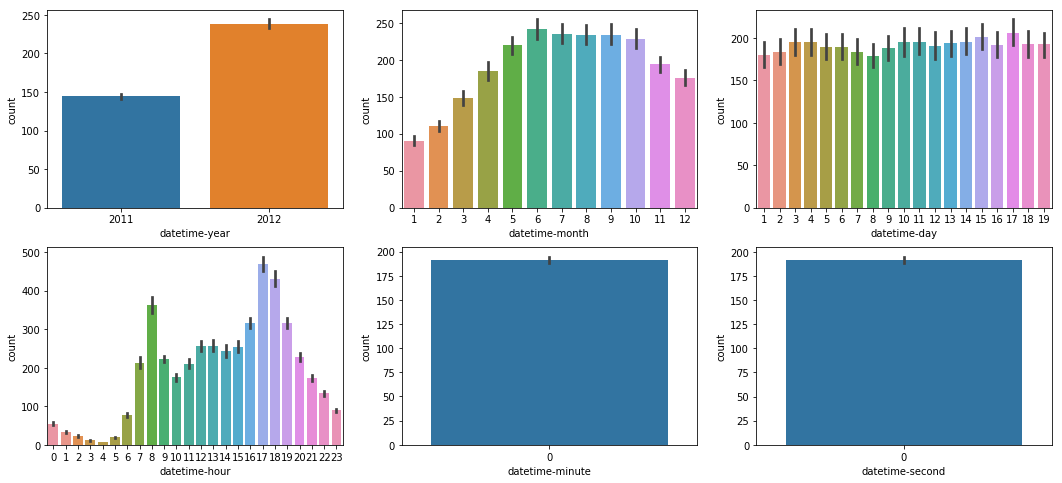

In [16]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows = 2, ncols = 3)
figure.set_size_inches(18,8)

sns.barplot(data=train, x="datetime-year", y="count", ax = ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax = ax2)
sns.barplot(data=train, x="datetime-day", y="count", ax = ax3)
sns.barplot(data=train, x="datetime-hour", y="count", ax = ax4)
sns.barplot(data=train, x="datetime-minute", y="count", ax = ax5)
sns.barplot(data=train, x="datetime-second", y="count", ax = ax6)

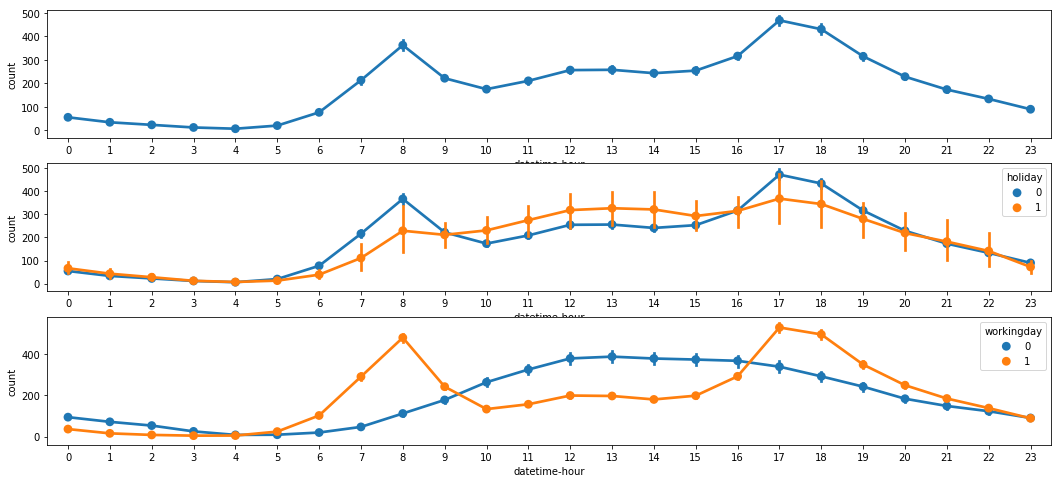

In [28]:
figure, (ax1,ax2,ax3) = plt.subplots(nrows=3, ncols=1)
figure.set_size_inches(18,8)
sns.pointplot(data = train, x="datetime-hour", y="count", ax=ax1)
sns.pointplot(data = train, x="datetime-hour", y="count", hue="holiday",ax=ax2)
sns.pointplot(data = train, x="datetime-hour", y="count", hue="workingday",ax=ax3)

In [29]:
#hue = holiday일때는 왜 표준편차가 그렇게 클까.. 표준편차가 크다는 의미는 무엇인가 
#holiday이면 토, 일,, 다른 휴일?아무튼 휴일일때랑 휴일 아닐때가 그래프 차이가 확연히 난다
#holiday = 1 은 토 , 일 
#workingday = 0 토, 일 + 다른 휴가 

## Explore hour - dayofweek

In [34]:
train["datetime-dayofweek"] = train["datetime"].dt.dayofweek
train["datetime-dayofweek"].head()

0    5
1    5
2    5
3    5
4    5
Name: datetime-dayofweek, dtype: int64

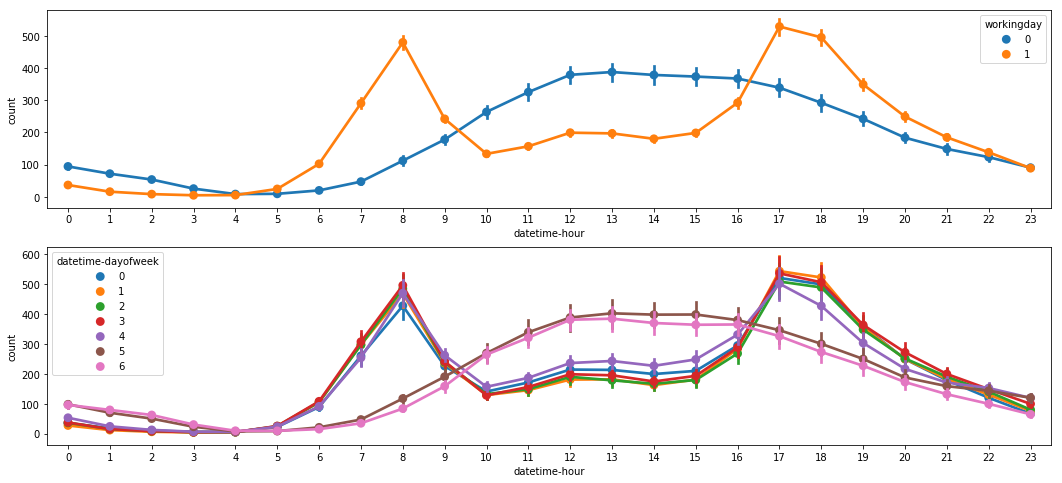

In [40]:
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols = 1)
figure.set_size_inches(18,8)

sns.pointplot(data=train, x="datetime-hour", y = "count", hue="workingday",ax = ax1)
sns.pointplot(data=train, x="datetime-hour", y="count", hue="datetime-dayofweek", ax=ax2)

# Concatenate year and month

In [47]:
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year,datetime.month)

train["datetime-year_month"] = train["datetime"].apply(concatenate_year_month)
print(train.shape)
train[["datetime", "datetime-year_month"]].head()

#train["datetime"].apply()   apply()의 의미는?

(10886, 20)


,datetime,datetime-year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


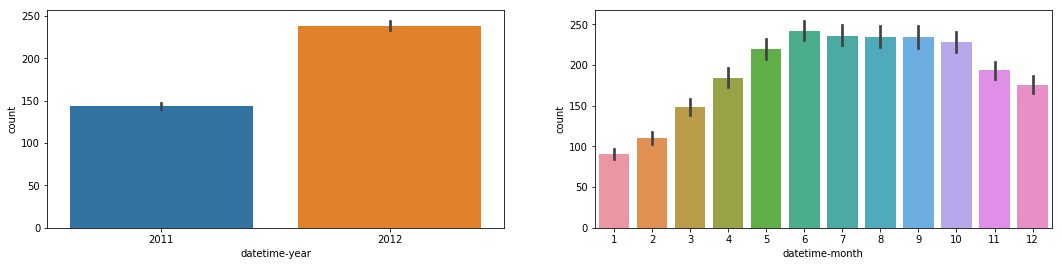

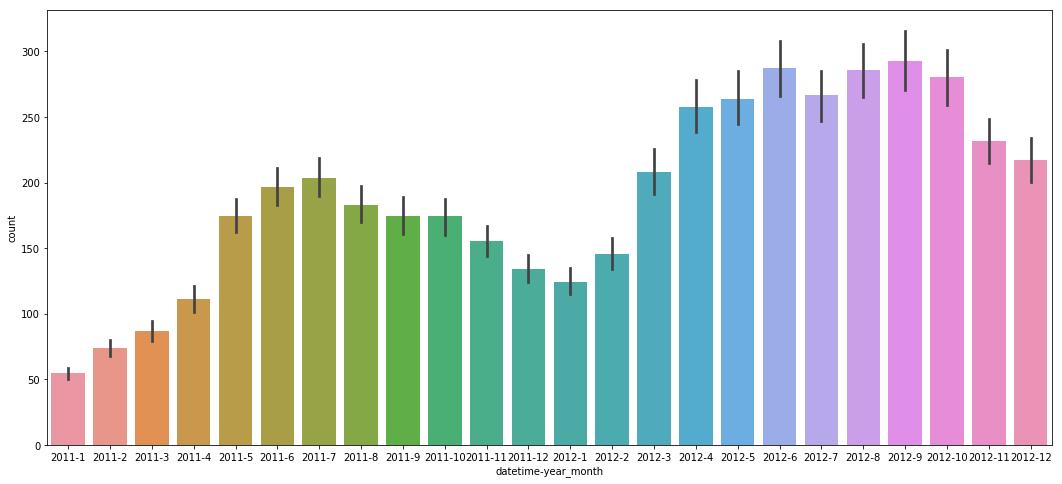

In [52]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols = 2)
figure.set_size_inches(18, 4)

sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)

figure, ax3 = plt.subplots(nrows=1, ncols = 1)
figure.set_size_inches(18, 8)

sns.barplot(data = train, x="datetime-year_month", y="count", ax = ax3)

# Reload Dataset

In [56]:
train = pd.read_csv("train_bike.csv", parse_dates = ["datetime"])
print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [58]:
test = pd.read_csv("test_bike.csv", parse_dates =["datetime"])

In [60]:
print(test.shape)
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


# Preprocessing

## parse datetime

In [65]:
train["datetime-year"] = train["datetime"].dt.year
train["datetime-month"] = train["datetime"].dt.month
train["datetime-day"] = train["datetime"].dt.day
train["datetime-hour"] = train["datetime"].dt.hour
train["datetime-minute"] = train["datetime"].dt.minute
train["datetime-second"] = train["datetime"].dt.second
train["datetime-dayofweek"] = train["datetime"].dt.dayofweek

print(train.shape)
train.head()

(10886, 19)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


In [70]:
test["datetime-year"] = test["datetime"].dt.year
test["datetime-month"] = test["datetime"].dt.month
test["datetime-day"] = test["datetime"].dt.day
test["datetime-hour"] = test["datetime"].dt.hour
test["datetime-minute"] = test["datetime"].dt.minute
test["datetime-second"] = test["datetime"].dt.second
test["datetime-dayofweek"] = test["datetime"].dt.dayofweek

print(test.shape)
test[["datetime", "datetime-year", "datetime-month", "datetime-day","datetime-minute", "datetime-second", "datetime-dayofweek"]].head()

(6493, 16)


,datetime,datetime-year,datetime-month,datetime-day,datetime-minute,datetime-second,datetime-dayofweek
0,2011-01-20 00:00:00,2011,1,20,0,0,3
1,2011-01-20 01:00:00,2011,1,20,0,0,3
2,2011-01-20 02:00:00,2011,1,20,0,0,3
3,2011-01-20 03:00:00,2011,1,20,0,0,3
4,2011-01-20 04:00:00,2011,1,20,0,0,3


# Train

In [72]:
feature_names = ["season", "holiday", "workingday", "weather", "temp", "atemp", "humidity", "windspeed", "datetime-year", "datetime-hour", "datetime-dayofweek"]
feature_names

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'datetime-year',
 'datetime-hour',
 'datetime-dayofweek']

In [75]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(10886, 11)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,datetime-dayofweek
0,1,0,0,1,9.84,14.395,81,0.0,2011,0,5
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,5
2,1,0,0,1,9.02,13.635,80,0.0,2011,2,5
3,1,0,0,1,9.84,14.395,75,0.0,2011,3,5
4,1,0,0,1,9.84,14.395,75,0.0,2011,4,5


In [78]:
label_name = "count"

y_train = train[label_name]
print(y_train.shape)
y_train.head()

(10886,)


0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [84]:
import numpy as np
y_train = np.log(y_train + 1)  #evaluation model에 맞게 y_train을 맞추려고 한다

print(y_train.shape)
y_train.head()

(10886,)


0    0.616122
1    0.660763
2    0.651080
3    0.603936
4    0.352793
Name: count, dtype: float64

In [90]:
from sklearn.metrics import make_scorer

def rmsle(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)
    
#     log_predict = np.log(predict + 1) 
#     log_actual = np.log(actual + 1)

    log_predict = predict + 1
    log_actual = actual + 1
    
    difference = log_predict - log_actual
    difference = np.square(difference)
    
    mean_difference = difference.mean() #평균을 구하고 
    
    score = np.sqrt(mean_difference) # 루트를 씌운다
    return score

rmsle_scorer = make_scorer(rmsle) #make_scorer 를 통해 scoring 방법을 만든다
rmsle_scorer

make_scorer(rmsle)

# Hyperparameter Tuning

### Case 1 - Grid Search

In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import cross_val_score

n_estimators = 300

max_depth_list = [5,10,15,20, 25, 30, 35, 40, 45, 50]
max_feature_list = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]

hyperparameters_list = []

for max_depth in max_depth_list:
    for max_features in max_feature_list:
        model = RandomForestRegressor(n_estimators=n_estimators,
                                     max_depth = max_depth,
                                     max_features=max_features,
                                     random_state=37,
                                     n_jobs=-1) # n_jobs는 무엇?
        score = cross_val_score(model, X_train, y_train, cv=20,\
                               scoring=rmsle_scorer).mean()
        
        hyperparameters_list.append({
            'score': score,
            'n_estimators': n_estimators,
            'max_depth': max_depth,
            'max_features': max_features,
        })
        
        print("Score = {0:.5f}".format(score))
hyperparameter_list

Score = 0.04891
Score = 0.03780
Score = 0.03290
Score = 0.03109
Score = 0.03039
Score = 0.03047
Score = 0.03789
Score = 0.02801
Score = 0.02503
Score = 0.02455
Score = 0.02444
Score = 0.02451
Score = 0.03347
Score = 0.02600
Score = 0.02399
Score = 0.02381
Score = 0.02372
Score = 0.02392
Score = 0.03283
Score = 0.02577
Score = 0.02402
Score = 0.02373


KeyboardInterrupt: 

In [94]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import cross_val_score

n_estimators = 300

max_depth_list = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
max_features_list = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]

hyperparameters_list = []

for max_depth in max_depth_list:
    for max_features in max_features_list:
        model = RandomForestRegressor(n_estimators=n_estimators,
                                      max_depth=max_depth,
                                      max_features=max_features,
                                      random_state=37,
                                      n_jobs=-1)

        score = cross_val_score(model, X_train, y_train, cv=20, \
                                scoring=rmsle_scorer).mean()

        hyperparameters_list.append({
            'score': score,
            'n_estimators': n_estimators,
            'max_depth': max_depth,
            'max_features': max_features,
        })

        print("Score = {0:.5f}".format(score))

hyperparameters_list

Score = 0.04891
Score = 0.03780
Score = 0.03290
Score = 0.03109
Score = 0.03039
Score = 0.03047
Score = 0.03789
Score = 0.02801
Score = 0.02503
Score = 0.02455
Score = 0.02444
Score = 0.02451
Score = 0.03347
Score = 0.02600
Score = 0.02399
Score = 0.02381
Score = 0.02372
Score = 0.02392
Score = 0.03283
Score = 0.02577
Score = 0.02402
Score = 0.02373
Score = 0.02377
Score = 0.02392
Score = 0.03286
Score = 0.02581
Score = 0.02397
Score = 0.02378
Score = 0.02378
Score = 0.02391
Score = 0.03298
Score = 0.02578
Score = 0.02397
Score = 0.02379
Score = 0.02377
Score = 0.02391
Score = 0.03296
Score = 0.02579
Score = 0.02397
Score = 0.02379
Score = 0.02377
Score = 0.02391
Score = 0.03296
Score = 0.02579
Score = 0.02397
Score = 0.02379
Score = 0.02377
Score = 0.02391
Score = 0.03296
Score = 0.02579
Score = 0.02397
Score = 0.02379
Score = 0.02377
Score = 0.02391
Score = 0.03296
Score = 0.02579
Score = 0.02397
Score = 0.02379
Score = 0.02377
Score = 0.02391


[{'max_depth': 5,
  'max_features': 0.1,
  'n_estimators': 300,
  'score': 0.048913727890947389},
 {'max_depth': 5,
  'max_features': 0.3,
  'n_estimators': 300,
  'score': 0.037798720135547408},
 {'max_depth': 5,
  'max_features': 0.5,
  'n_estimators': 300,
  'score': 0.032896069630372247},
 {'max_depth': 5,
  'max_features': 0.7,
  'n_estimators': 300,
  'score': 0.031090581348781527},
 {'max_depth': 5,
  'max_features': 0.9,
  'n_estimators': 300,
  'score': 0.030394052492131552},
 {'max_depth': 5,
  'max_features': 1.0,
  'n_estimators': 300,
  'score': 0.030466822031477568},
 {'max_depth': 10,
  'max_features': 0.1,
  'n_estimators': 300,
  'score': 0.037893678439790891},
 {'max_depth': 10,
  'max_features': 0.3,
  'n_estimators': 300,
  'score': 0.028005791388404123},
 {'max_depth': 10,
  'max_features': 0.5,
  'n_estimators': 300,
  'score': 0.025032083853565458},
 {'max_depth': 10,
  'max_features': 0.7,
  'n_estimators': 300,
  'score': 0.024550586220827175},
 {'max_depth': 1

In [ ]:
hyperparameters_list = pd.DataFrame